# Build 2 Layer Convolutional Network

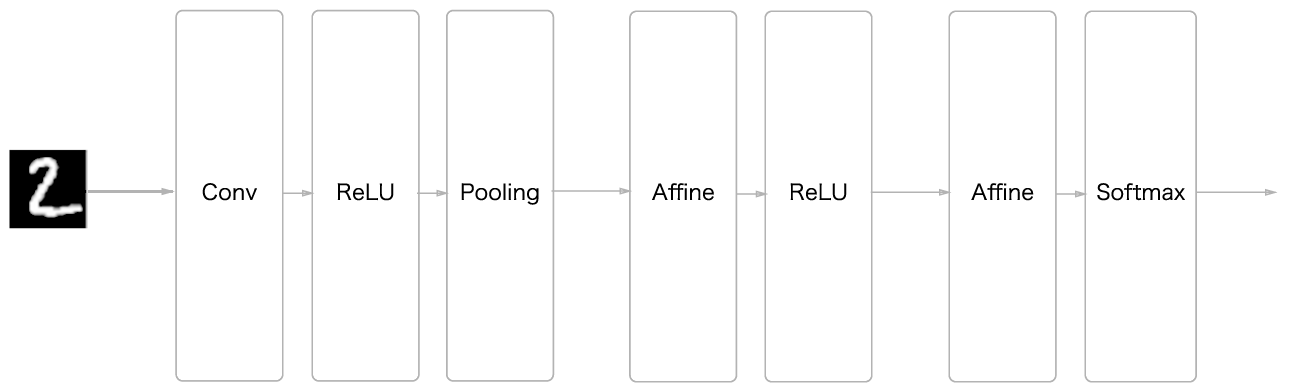

*   Conv-Relu-Pooling-Affine-Relu-Affine-Softmax 로 이루어진 신경망 구현하기
*   Relu, Softmax 등의 함수는 이전에 썼던 것을 임포트해서 그냥 사용하겠습니다



In [ ]:
# 책에 올라와있던 라이브러리 clone

! git clone https://github.com/WegraLee/deep-learning-from-scratch.git

In [ ]:
import os
os.chdir('/content/deep-learning-from-scratch')
!pwd

# Define Convolution Class

답을 모를 시 /common.layers.py 참고!!

In [ ]:
Simport sys, os
sys.path.append(os.pardir)
from common.util import im2col
from common.util import col2im

class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    # initialization
    ### Fill in here ###

    # 중간 데이터（backward 시 사용）
    self.x = None   
    self.col = None
    self.col_W = None
    
    # 가중치와 편향 매개변수의 기울기
    self.dW = None
    self.db = None
  
  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    # 결과값의 height와 width 계산
    ### Fill in here ###
    out_h = 
    out_w = 

    # feature map shaping 및 필터 전개 후 계산
    ### Fill in here ###

    # output reshaping
    ### Fill in here ###
    out = 

    self.x = x
    self.col = col
    self.col_W = col_W

    return out
  
  def backward(self, dout):
    # Affine과 유사한 backward 함수 구현
    FN, C, FH, FW = self.W.shape

    # dout 계산 가능한 모양으로 shaping
    ### Fill in here ###
    dout =

    # db, dW 계산 및 계산 가능한 모양으로 reshaping
    ### Fill in here ###
    self.db =
    self.dW =
    # dW reshape
    self.dW = 

    # 행렬 곱으로 dcol 계산 후 reshaping 한 뒤 dx에 저장
    ### Fill in here ###
    dcol = 
    dx = 

    return dx

# Define Pooling Class

backward는 안건드려도 됨

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    # initalizaiton
    ### Fill in here ###

    self.x = None
    self.arg_max = None
  
  def forward(self, x):
    N, C, H, W = x.shape
    # 결과값의 height와 width 계산
    ### Fill in here ###
    out_h = 
    out_w = 

    # 입력 데이터 전개
    ### Fill in here ###

    arg_max = np.argmax(col, axis=1)

    # 행별 최대값 구함
    ### Fill in here ###
    out = 

    # 출력 데이터 모양으로 성형
    ### Fill in here ###
    out = 

    self.x = x
    self.arg_max = arg_max

    return out

  def backward(self, dout):
    dout = dout.transpose(0, 2, 3, 1)
    
    pool_size = self.pool_h * self.pool_w
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape + (pool_size,)) 
    
    dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
    dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
    
    return dx

# Convolutional Network Layer 구성

Conv - Relu - Pooling - Affine - Relu - Affine - Softmax Layer 구현

Initialization Parameters:


*   input_dim - 입력 데이터(채널수, 높이, 너비)의 차원: (1, 28, 28)
*   conv_param - 합성곱 계층의 하이퍼파라미터(딕셔너리)
  * filter_num - 필터 수: 30
  * filter_size - 필터 크기: 5
  * stride - 스트라이드: 1
  * pad - 패딩: 0
* hidden_size - 은닉층(완전연결)의 뉴런 수: 100
* output_size - 출력층(완전연결)의 뉴런 수: 10
* weight_init_std - 초기화 할 때의 가중치 표준편차: 0.01


In [ ]:
from typing_extensions import OrderedDict
from common.layers import *

class SimpleConvNet:
  # initialization
  # 파라미터도 써줘야됨!!!!!
  def __init__(self, 여기도 채워넣으셈!!!):

    ### Fill in here ###

    input_size = 

    ### Fill in here ###
    conv_output_size = 
    pool_output_size = 

    # 가중치 매개변수 초기화
    self.params = {}
    ### Fill in here ###

    # CNN 구성 계층 생성
    self.layers = OrderedDict()
    ### Fill in here ###
  
  def predict(self, x):
    ### Fill in here ###
    return x
  
  def loss(self, x, t):
    ### Fill in here ###
    return 0
  
  def gradient(self, x, t):
    # 순전파
    ### Fill in here ###

    # 역전파
    ### Fill in here ###

    # 결과 저장
    grads = {}
    ### Fill in here ###

    return grads
